# Machine Learning - Redes Neuronales Recurrentes

**Relator: Felipe Mesa Abraham** 

Correo: femesa@udec.cl


En esta actividad se trabajará con la libreria [Keras](https://keras.io/), donde se presentará un ejemplo del uso de una red neuronal recurrente aplicada a una serie de tiempo.

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [9]:
# Importamos los datos y los dejamos en el formato adecuado como un numpy array
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = read_csv(url, usecols=[1], engine='python')
data = np.array(df.values.astype('float32'))


In [10]:
df.head()

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0


In [11]:
# Pre procesamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()


# Dividimos los datos en set de entrenamiento y set de test
n = len(data)
split = int(n*0.8)
train_data = data[range(split)]
test_data = data[split:]

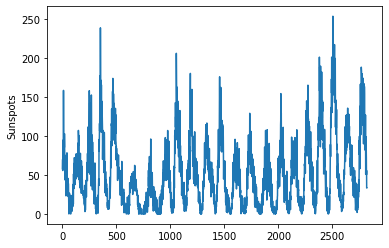

In [31]:
# Revisemos un poco la serie de tiempo
import seaborn as sns
sns.lineplot(data=df, x=df.index, y=df['Sunspots'])

In [33]:
# Como tenemos ciclos de 12 meses, vamos a dividir el dataset en conjuntos
# X va a tener del mes 1 al 11
# y va a tener el mes 12

# Preparamos los conjuntos X e y

def get_XY(dat, time_steps):

    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]

    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [36]:
# Construimos la red recurrente
model = Sequential()
model.add(SimpleRNN(units=3, input_shape=(time_steps,1), activation='tanh'))
model.add(Dense(units=1, activation='tanh'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos el modelo y commenzamos el entrenamiento (recuerde cambiar a GPU para entrenar mas rapido)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

In [44]:
# Calculamos el RMSE
test_predict = model.predict(testX)
rmse = math.sqrt(mean_squared_error(testY, test_predict))
rmse

In [45]:
train_predict = model.predict(trainX)